In [15]:
# need to do this for non-installed-package imports (e.g. the NISAR package)
import sys
sys.path.append('..')

In [16]:
from NISAR import GCOV

import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, show_hist

In [17]:
%%time
# lazy-load of just the metadata
ds = GCOV('../reference/NISAR_L2_PR_GCOV_001_005_A_219_4020_SHNA_A_20081012T060910_20081012T060926_P01101_F_N_J_001.h5')

CPU times: total: 15.6 ms
Wall time: 53.1 ms


In [18]:
# listing of available polarisations in product
ds.available_polarisations

['HH']

In [19]:
# can access the projection of the geocoded data
ds.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

POLYGON Z ((-118.229107146143 34.2431342896942 661.000000001554, -118.145522915187 34.257397603176 660.999999999149, -118.064137232819 34.2712264741239 660.999999999502, -117.984760385543 34.2846577015847 661.000000000626, -117.907227843581 34.2977232000624 660.999999998769, -117.831395833097 34.3104508582659 660.999999999278, -117.757137860543 34.322865213202 660.999999999601, -117.684341950371 34.3349879859182 660.999999999945, -117.61290842503 34.3468385120739 661.000000003078, -117.542748102612 34.3584340915119 660.999999999902, -117.473780820005 34.3697902746978 661.000000000963, -117.49777416882 34.468506908443 661.000000000673, -117.521798728296 34.5672199484267 661.000000001588, -117.54585470495 34.6659293820809 660.999999997323, -117.569942306597 34.7646351968015 660.999999999869, -117.594061742366 34.8633373799469 660.999999997069, -117.61821322271 34.9620359188374 660.999999999398, -117.642396959418 35.0607308007539 661.000000000268, -117.666613165627 35.1594220129379 661.00

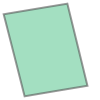

In [20]:
# can access the image geometry in geographic coordinates (shows as shape in notebooks)
print(ds.footprint)
ds.footprint

In [21]:
%%time
image_dict = ds.load_data('HH')
image_dict

CPU times: total: 31.2 ms
Wall time: 350 ms


{'HH': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
       shape=(6220, 4545), dtype=float32)}

In [22]:
hh_covariance = image_dict['HH']
# need to mask out any inf values
hh_covariance[~np.isfinite(hh_covariance)] = np.nan
# convert to dB
hh_dB = 10 * np.log10(hh_covariance)

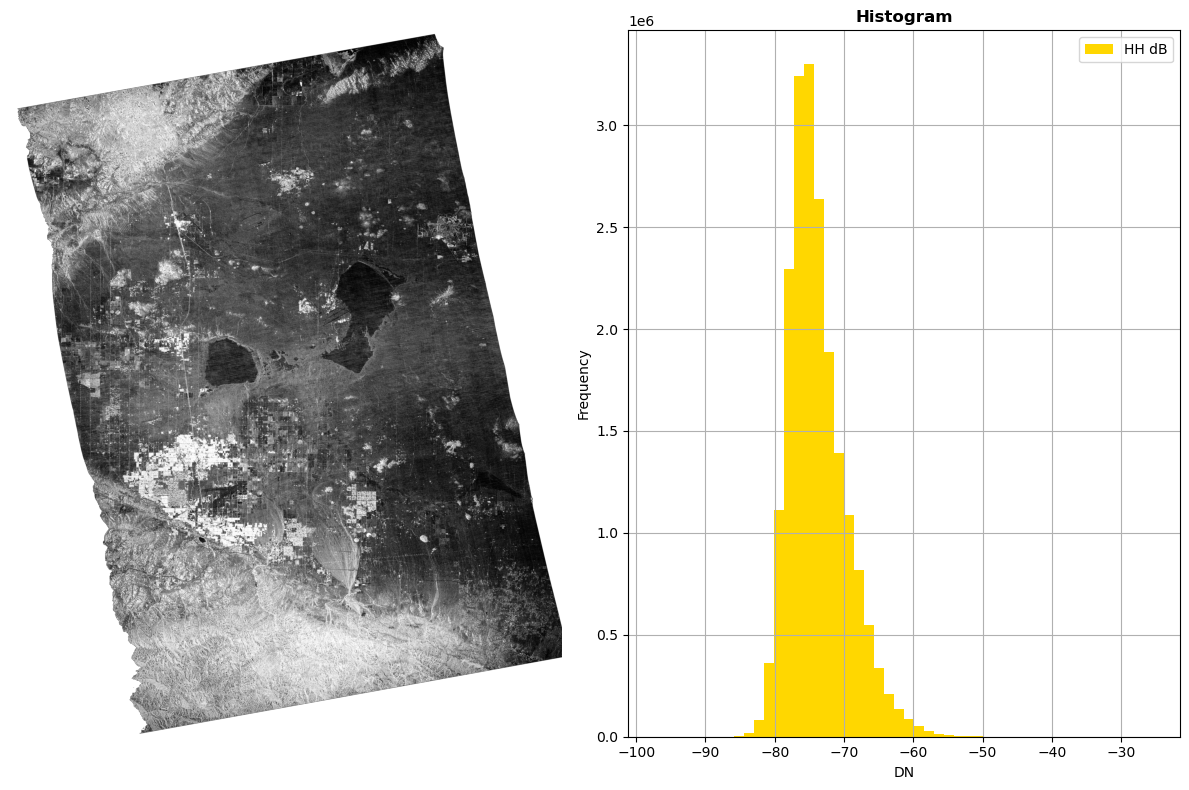

In [23]:
# apply a 5% clip for viewing
vmin, vmax = np.nanpercentile(hh_dB, (5, 95))

fig, (ax_img, ax_hist) = plt.subplots(1, 2, figsize=(12, 8))
show(hh_dB, vmin=vmin, vmax=vmax, cmap='grey', ax=ax_img, aspect='auto')
show_hist(hh_dB, bins=50, title='Histogram', label='HH dB', ax=ax_hist)
ax_img.axis('off')
fig.tight_layout();